In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_json('tvSeries_complete.json', orient='records')

In [3]:
print(raw_data.shape)
print(raw_data.head(10).keywords)

(8735, 12)
0    based-on-novel,dragon,politics,nudity,incest,q...
1    cancer,chemistry,methamphetamine,albuquerque-n...
2    government-conspiracy,1980s,friendship,telekin...
3    zombie,survival,post-apocalypse,based-on-comic...
4    friendship,friend,new-york-city,roommate,divor...
5    friendship,detective,modernized-setting,genius...
6    nerd,geek-culture,friend,roommate,best-friend,...
7    double-life,police-department,dark-secret,homi...
8    group-of-friends,friendship,sitcom,best-friend...
9    office,mockumentary,cringe-comedy,job,sitcom,w...
Name: keywords, dtype: object


### Bag of words feature representation for descriptive text

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

corpus = raw_data['keywords']
X = vectorizer.fit_transform(corpus)
X.shape

(8735, 14672)

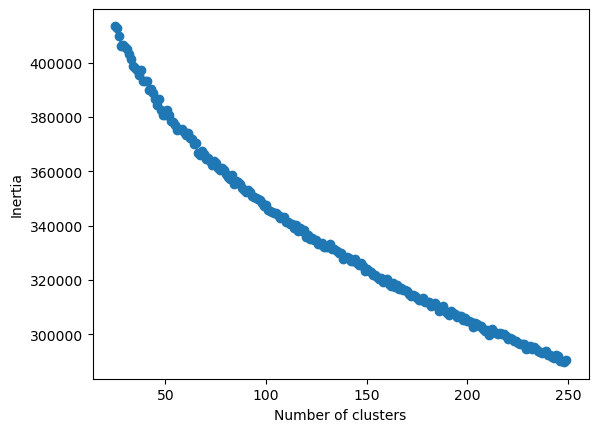

In [5]:
# first attempt at fitting K means to view change in Inertia
from sklearn.cluster import KMeans

# container to store inertia scores over iterations
distortions = []

# # fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(25, 250):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

len(distortions)
    
# vizualize change in inertia
plt.plot(range(25, 250), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

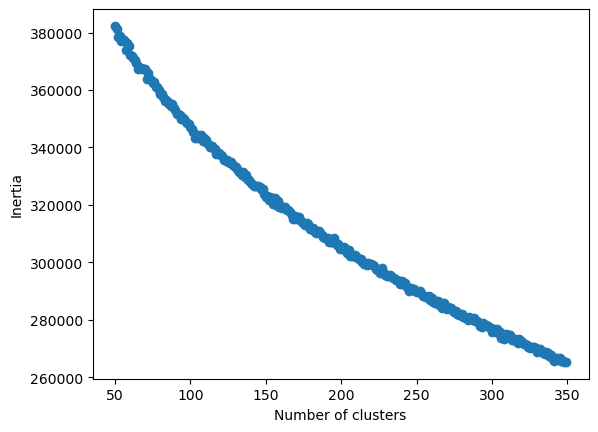

In [17]:
# first attempt at fitting K means to view change in Inertia
from sklearn.cluster import KMeans

# container to store inertia scores over iterations
distortions = []

# # fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(50, 350):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

len(distortions)
    
# vizualize change in inertia
plt.plot(range(50, 350), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

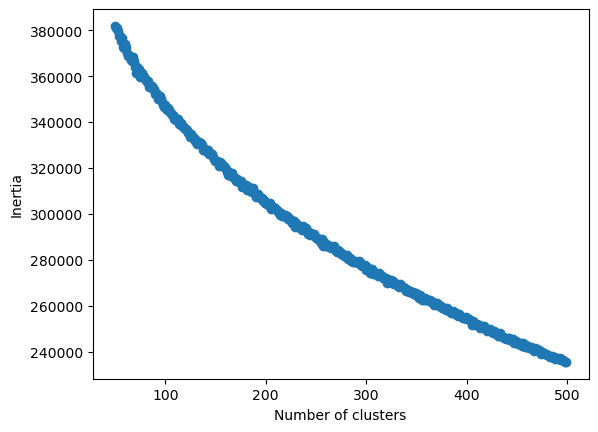

In [23]:
# first attempt at fitting K means to view change in Inertia
from sklearn.cluster import KMeans

# container to store inertia scores over iterations
distortions = []

# # fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(50, 500):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

len(distortions)
    
# vizualize change in inertia
plt.plot(range(50, 500), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### fit Kmeans

In [18]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=500, n_init=30)
km.fit(X)

KMeans(n_clusters=500, n_init=30)

### labels are named with integers and stored in the `labels_` attribute

In [19]:
km.labels_

array([ 33,  43, 102, ...,  50,  21, 175], dtype=int32)

### take a look at one of the cluster results

In [27]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 77:
        print(raw_data['primaryTitle'][i])
        print(raw_data['genres'][i])
        print(raw_data['keywords'][i])
        print('**********')

The Good Place
Comedy,Drama,Fantasy
afterlife,heaven,utopia,ethics,neighborhood,hell,frozen-yogurt,morality,death,deception,plot-twist,community,architect,friendship,flashback,torture,assistant,repetition,paradise,changing-the-past,soulmate,professor,perfection,female-protagonist,purgatory,slacker,loner,escape-from-hell,trapped-in-hell,mind-game,human-demon-team,philosophy,existentialism,second-chance,friendly-demon,demon-in-human-form,white-female-lead-in-a-diverse-cast,male-antagonist,sitcom,feel-good-romance,supernatural-fantasy,supernatural-drama,high-concept-comedy,quirky-comedy,ethic,lie,heavenly-fantasy,feel-good,eternal-being,eternal-creature,sitcom-comedy,three-word-title
**********
After Life
Comedy,Drama
lashing-out,newspaper-office,dog,husband-wife-relationship,suicide,mailman,sex-worker,widow,two-word-title,love,loss-of-loved-one,suicidality,depression,bereavement,coping,bitterness,sadness,death-of-loved-one,death-of-spouse,grieving,death,surviving,happiness,sorrow,grief,d

In [21]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [250, 300, 350, 400, 450]

For n_clusters = 250 The average silhouette_score is : 0.016766452391395563


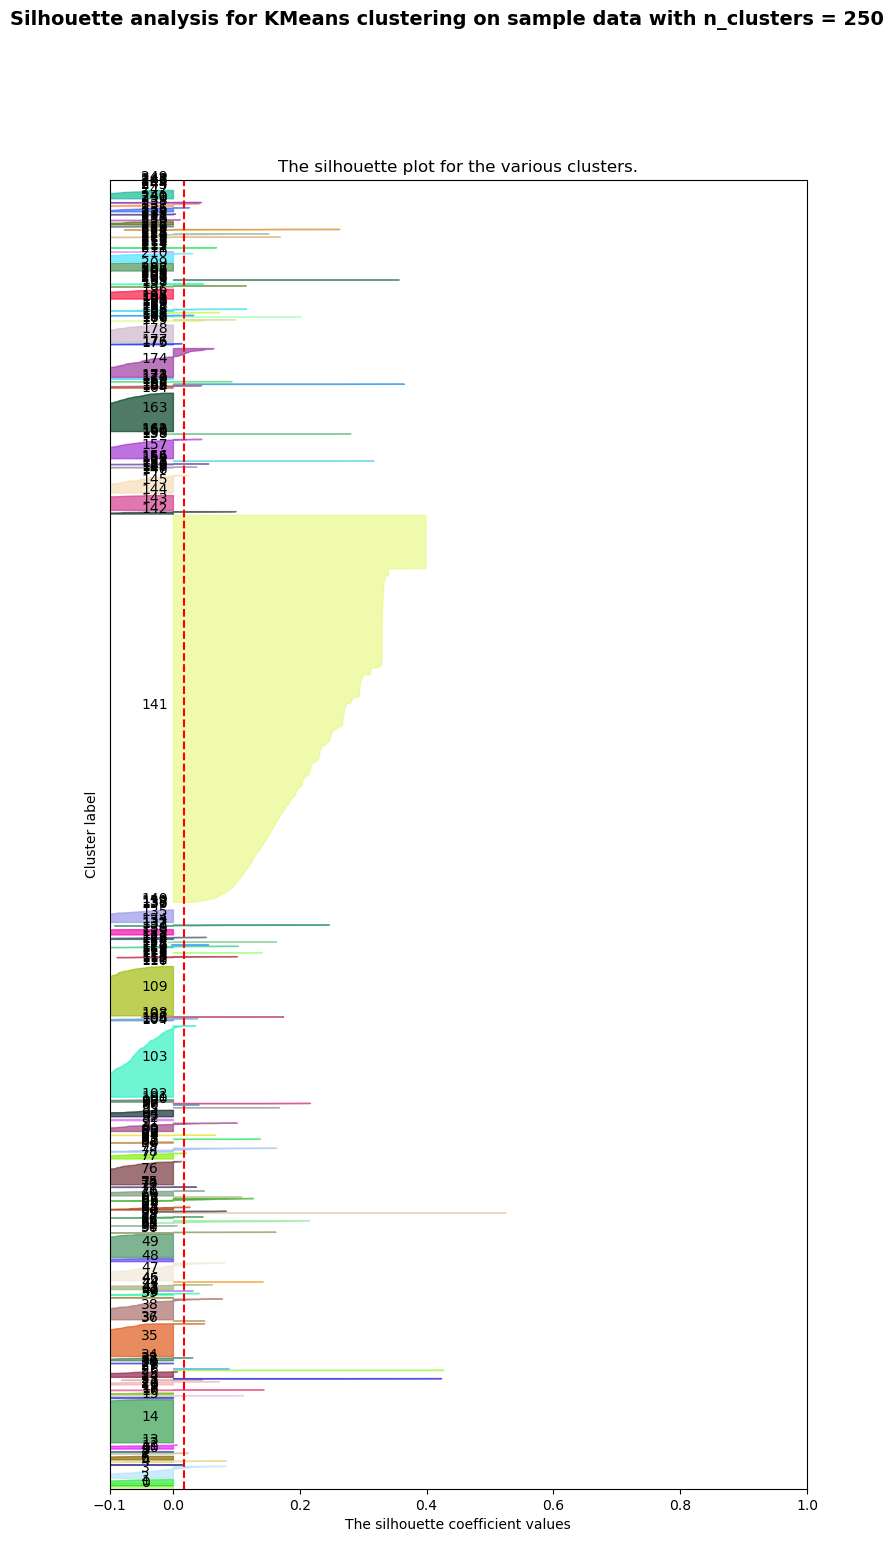

For n_clusters = 300 The average silhouette_score is : -0.009813843162083625


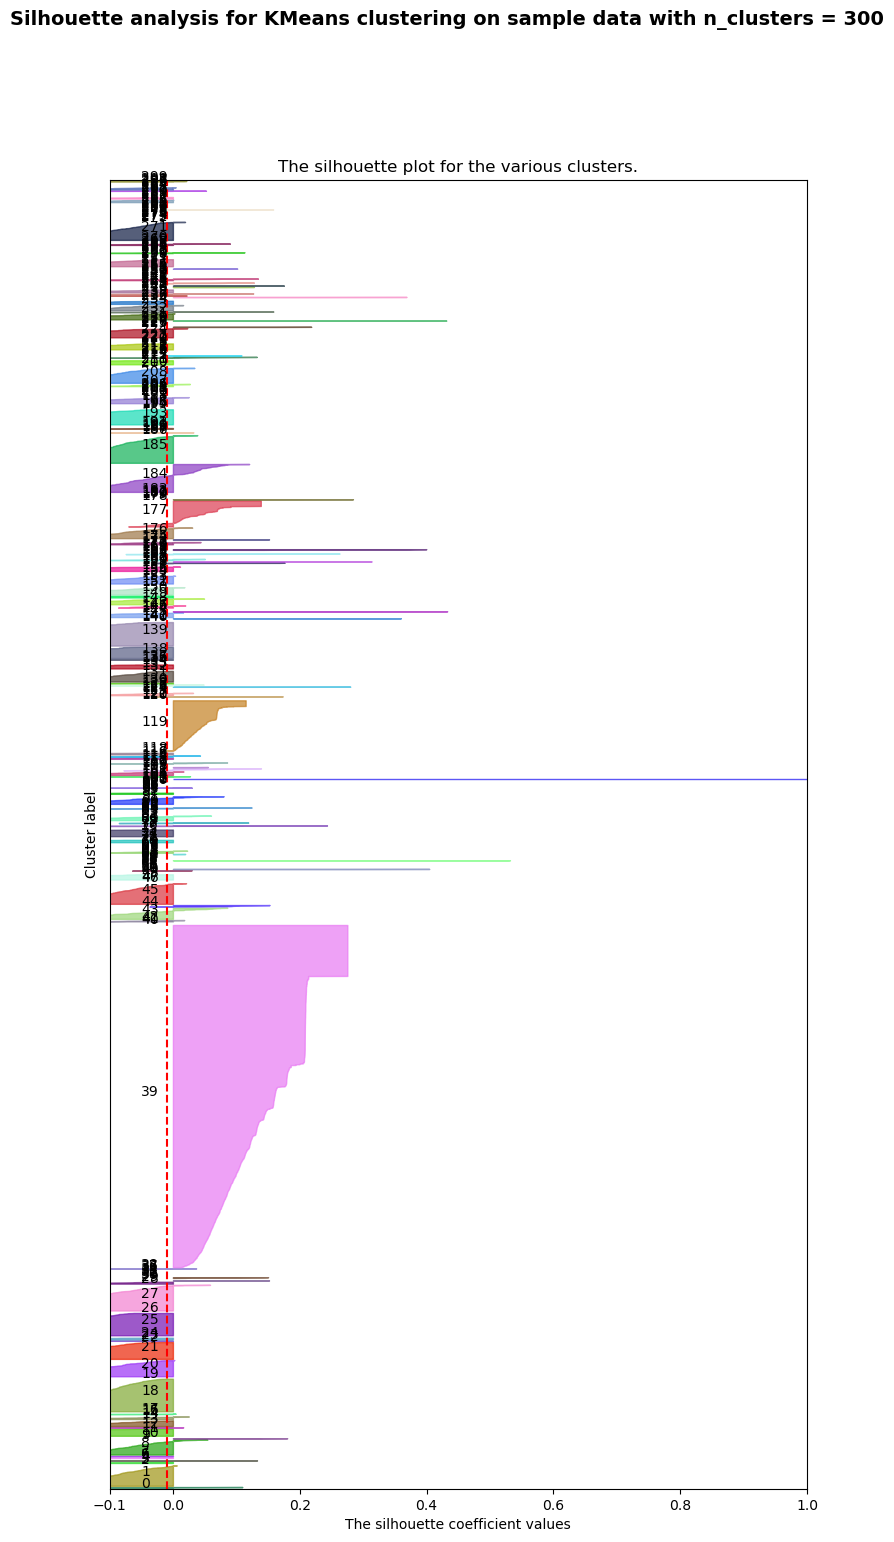

For n_clusters = 350 The average silhouette_score is : -0.012221263476761064


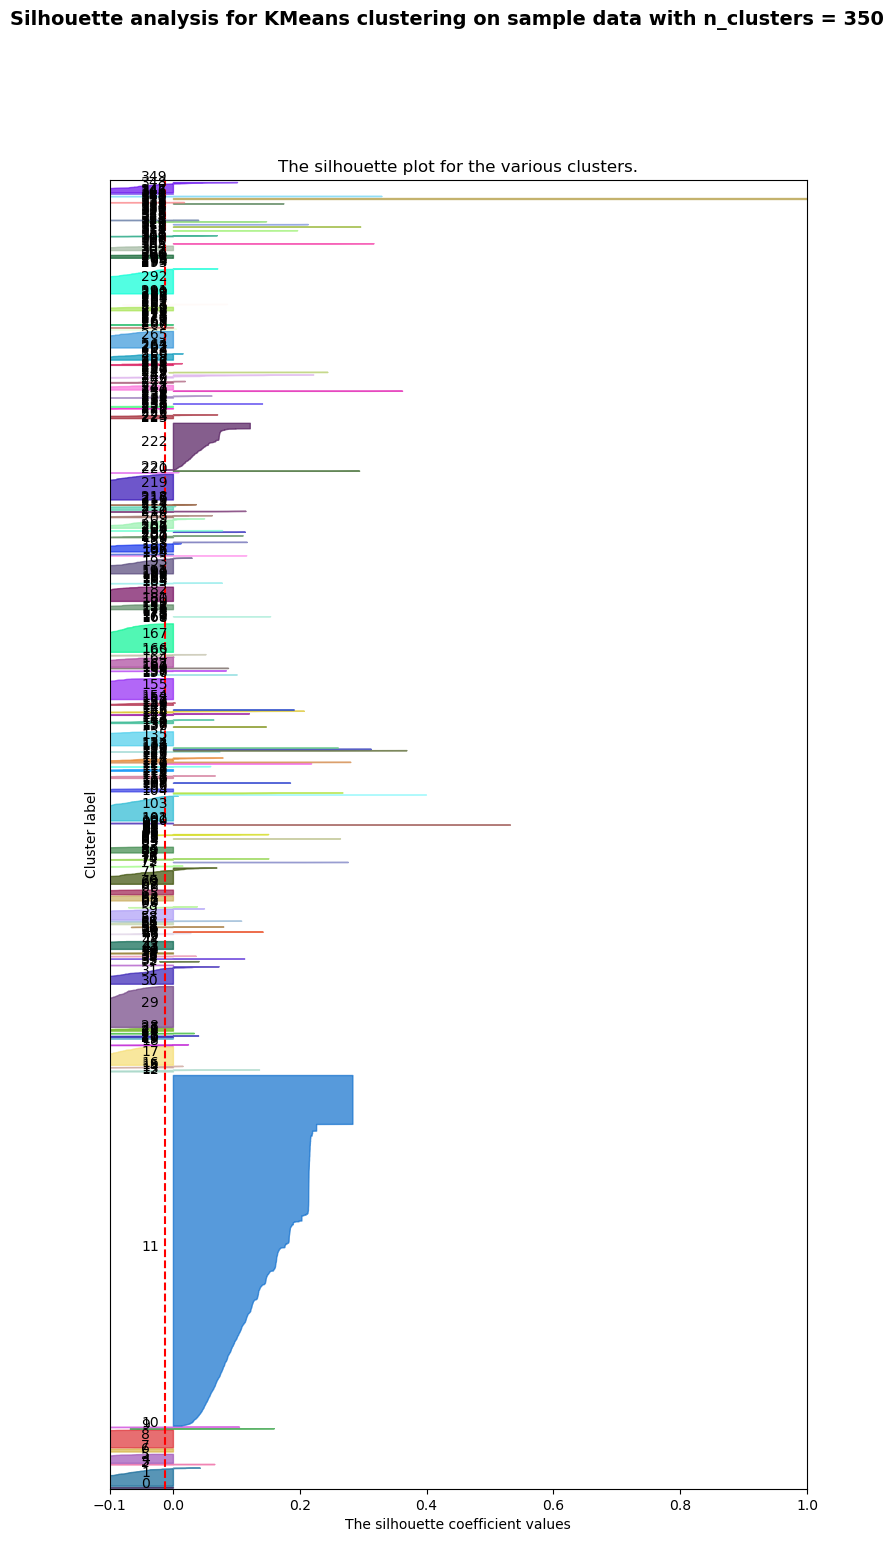

For n_clusters = 400 The average silhouette_score is : 0.0037340998604437413


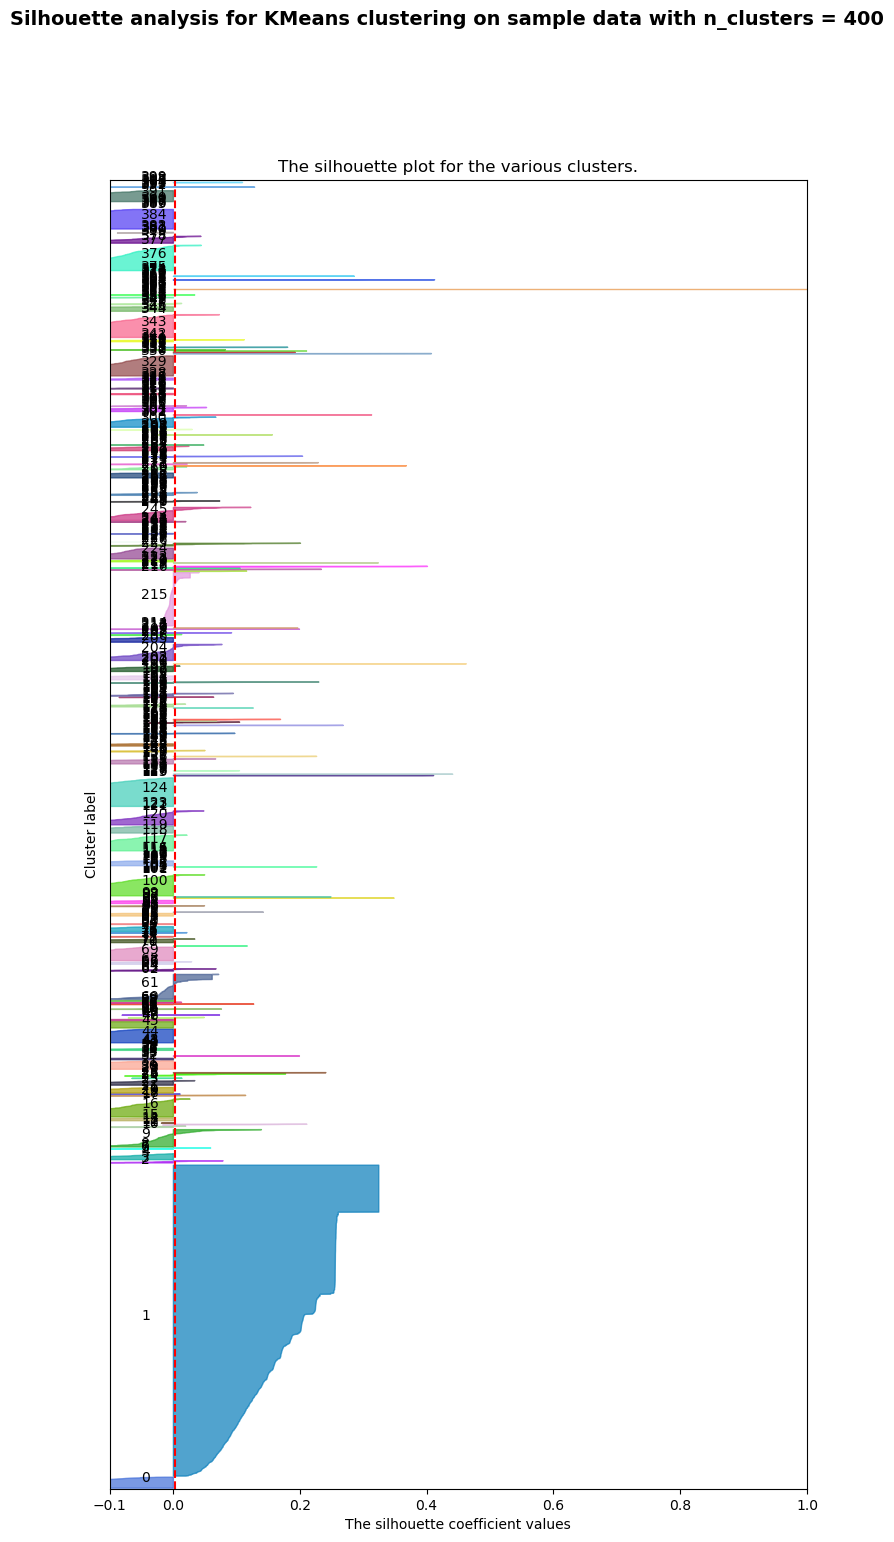

For n_clusters = 450 The average silhouette_score is : -0.005281166193183441


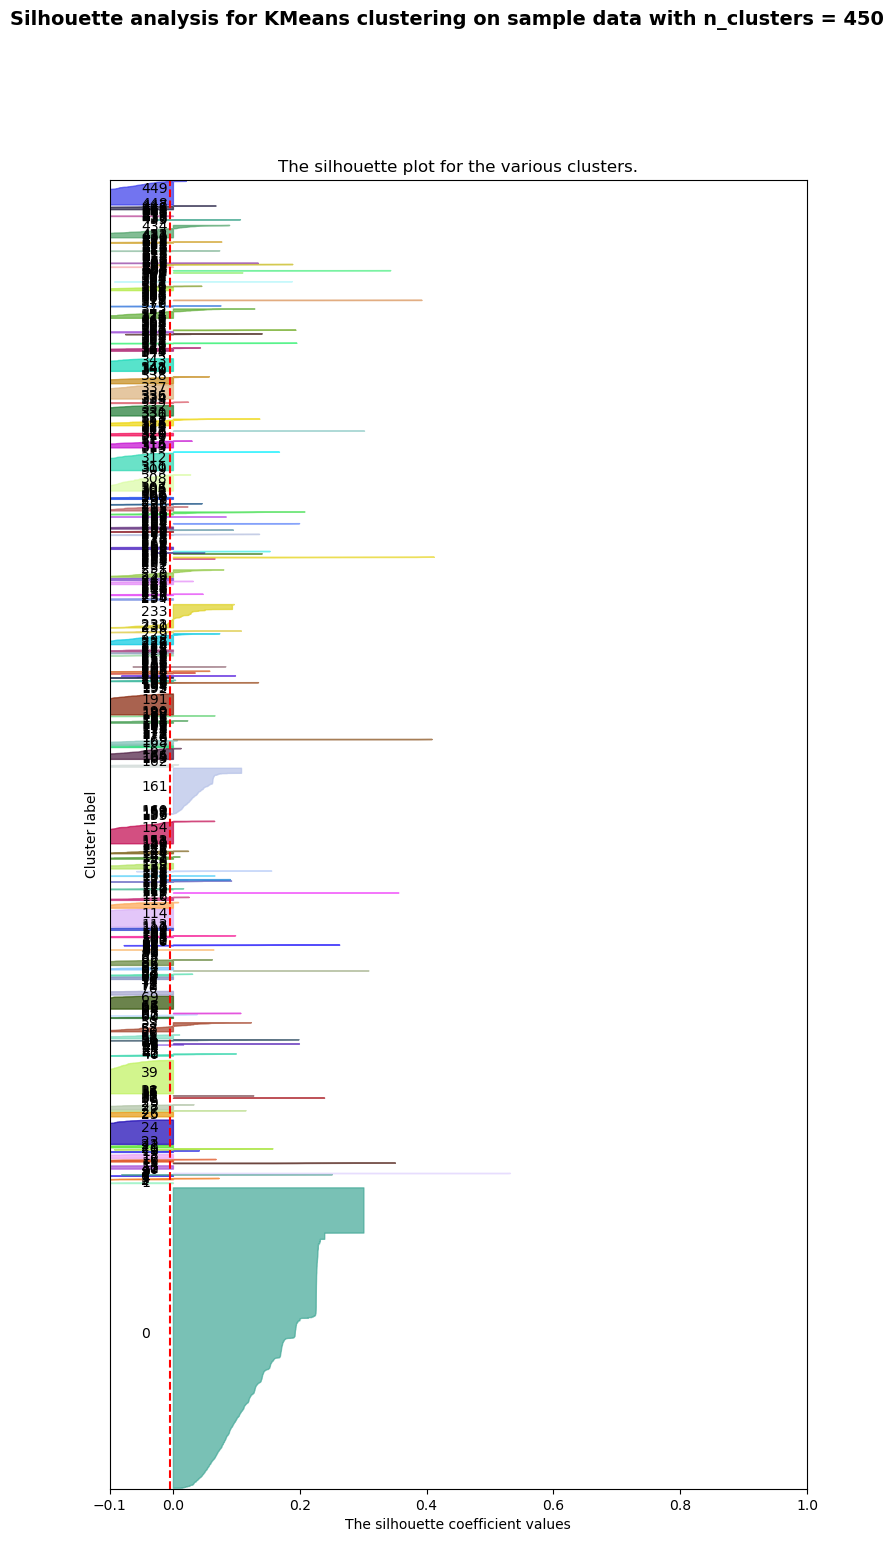

In [22]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.set_ylim([0, len(km.labels_) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()